In [1]:
!nvidia-smi

Fri May 10 11:58:42 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:07:00.0 Off |                   On |
| N/A   30C    P0    45W / 400W |     24MiB / 40536MiB |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:0F:00.0 Off |                   On |
| N/A   

In [2]:
import torch
torch.cuda.device_count()

1

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA A100-SXM4-40GB MIG 1g.5gb'

In [5]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader, random_split
from torch.utils.data import Subset
from torch import nn

import torch.nn.functional as F
from torchvision.models import resnet50, ResNet50_Weights
from torch.nn import Parameter

import matplotlib.pyplot as plt
import math

import numpy as np
import pandas as pd

from PIL import Image
import pathlib
from pathlib import Path

import os
import zipfile

from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
data_path = Path("celeba_identity_dataset/")

#image_path = data_path / "train"

#train_dir = data_path / "train" / "train"
#test_dir = data_path / "test" / "test"

image_path = data_path
train_dir = data_path / "train"

train_dir

PosixPath('celeba_identity_dataset/train')

178754


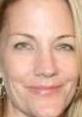

In [9]:
from PIL import Image
import random
#random.seed(42)

image_path_list = list(train_dir.glob("*/*.jpg"))

print(len(image_path_list))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

#random_image_path,image_class ,img.height,img.width
img

In [9]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images")

walk_through_dir("celeba_identity_dataset/train")

there are 10133 directories and 0 images
there are 0 directories and 5 images
there are 0 directories and 1 images
there are 0 directories and 18 images
there are 0 directories and 21 images
there are 0 directories and 18 images
there are 0 directories and 9 images
there are 0 directories and 19 images
there are 0 directories and 17 images
there are 0 directories and 1 images
there are 0 directories and 18 images
there are 0 directories and 17 images
there are 0 directories and 18 images
there are 0 directories and 9 images
there are 0 directories and 27 images
there are 0 directories and 3 images
there are 0 directories and 27 images
there are 0 directories and 12 images
there are 0 directories and 22 images
there are 0 directories and 20 images
there are 0 directories and 11 images
there are 0 directories and 14 images
there are 0 directories and 27 images
there are 0 directories and 5 images
there are 0 directories and 27 images
there are 0 directories and 26 images
there are 0 dire

In [10]:
test_dir = data_path / "test"
test_dir

PosixPath('celeba_identity_dataset/test')

In [9]:
walk_through_dir("celeba_identity_dataset/test")

NameError: name 'walk_through_dir' is not defined

In [11]:
from PIL import Image
import random
#random.seed(42)

image_path_list = list(test_dir.glob("*/*.jpg"))

print(len(image_path_list))

23604


In [12]:
transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

train_data = datasets.ImageFolder(root=train_dir,transform=transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=transform,target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 178754
     Root location: celeba_identity_dataset/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 23604
     Root location: celeba_identity_dataset/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ))

In [13]:
image, label = train_data[5]
image, label,

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

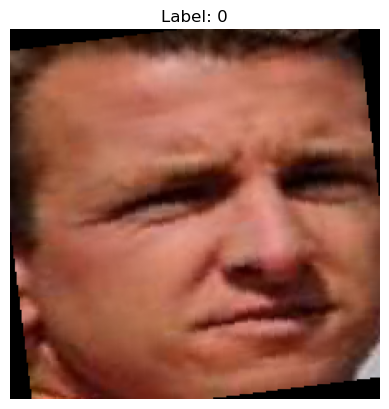

In [14]:
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')  # Turn off axis labels
plt.show()

In [15]:

train_Dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

test_Dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

len(test_Dataloader),len(train_Dataloader)

(738, 5587)

In [16]:
class ArcFace(nn.Module):
    def __init__(self, feature_in, feature_out, margin=0.3, scale=64):
        super(ArcFace, self).__init__()
        self.feature_in = feature_in
        self.feature_out = feature_out
        self.scale = scale
        self.margin = margin

        # Use a pre-trained ResNet-50 as backbone
        self.resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

        # Remove the last fully connected layer and pooling layers
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-2])

        # Add a new fully connected layer
        # Add a new fully connected layer
        self.fc = nn.Linear(2048, self.feature_in)
        nn.init.xavier_normal_(self.fc.weight)
        nn.init.constant_(self.fc.bias, 0)

        # Add a batch normalization layer
        self.bn = nn.BatchNorm1d(self.feature_in)

        # Add a weights tensor for ArcFace
        self.weights = nn.Parameter(torch.randn(self.feature_out, self.feature_in))
        nn.init.xavier_normal_(self.weights)

    def forward(self, x, targets):
        x = self.resnet(x)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.bn(x)
        x = F.relu(x)

        # Normalize the input features and weights
        x = F.normalize(x, p=2, dim=1)
        weights = F.normalize(self.weights, p=2, dim=1)

        # Compute the cosine similarity
        cos_theta = F.linear(x, weights)

        # Apply the ArcFace margin
        arc_cos = torch.acos(cos_theta)
        M = F.one_hot(targets, num_classes=self.feature_out) * self.margin
        arc_cos += M
        cos_theta_2 = torch.cos(arc_cos)

        # Scale the logits
        logits = cos_theta_2 * self.scale

        return logits


# Example usage:
# model = ArcFace(feature_in=512, feature_out=num_classes)
# inputs = torch.randn((batch_size, 3, 224, 224))
# targets = torch.randint(0, num_classes, (batch_size,))
# outputs = model(inputs, targets)


In [17]:
loaded_model_2 = torch.load(f="models/arcface_celeba_model.pth")
loaded_model_2 = loaded_model_2.to(device)
loaded_model_2 = nn.DataParallel(loaded_model_2)
loaded_model_2

DataParallel(
  (module): DataParallel(
    (module): ArcFace(
      (resnet): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (4): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(loaded_model_2.parameters(), lr=0.01)

In [24]:
cd celeba_identity_dataset

/dgxa_home/se20ucse148/Arcface/celeba_identity_dataset


In [26]:
for i in range(1, 16 + 1):
    folder_path = f"test2.{i}"
    os.makedirs(folder_path, exist_ok=True)

In [27]:
import cv2
print(cv2.__version__)
import os
import matplotlib.pyplot as plt
from IPython.display import display, Image

root_dir = "test"

for identity_folder in os.listdir(root_dir):
    item_path = os.path.join(root_dir, identity_folder)
    for img_file in os.listdir(item_path):
        img_path = os.path.join(item_path, img_file)
        if img_file.endswith(".jpg"):
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            box_width = img.shape[1] // 4
            box_height = img.shape[0] // 4
            
            result_images = []
            
            for i in range(4):
                for j in range(4):
                    x1 = j * box_width
                    y1 = i * box_height
                    x2 = (j + 1) * box_width
                    y2 = (i + 1) * box_height
            
                    box_img = img.copy()
                    box_img[y1:y2, x1:x2] = 0
            
                    result_images.append(box_img)
            #print(len(result_images))

            for i, box_img in enumerate(result_images):
                output_path = os.path.join(f"test2.{i+1}",identity_folder)
                os.makedirs(output_path, exist_ok=True)
                output_path = os.path.join(output_path, img_file)
                #print(output_path)
                cv2.imwrite(output_path, box_img)

            #display(Image(filename=img_path))
            #print(f"Identity Folder: {identity_folder}, Image: {img_file}")
            #print(img_path)


4.9.0


In [33]:
cd ..

/dgxa_home/se20ucse148/Arcface


In [34]:
from tqdm.auto import tqdm

results = {
    "test_loss": [],
    "test_acc": []
}

for i in range(1, 16 + 1):
  print(f"mask no: {i}\n-----")
  test_loss, test_acc = 0, 0
  test_dir = data_path / f"test2.{i}"
  test_data = datasets.ImageFolder(root=test_dir,transform=transform,target_transform=None)
    
  loaded_model_2.eval()

  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_Dataloader):

      X_test = X_test.to(device)
      y_test = y_test.to(device)

      output2 = loaded_model_2(X_test, y_test)

      test_loss += loss_fn(output2,y_test).item()

      test_pred_labels = torch.argmax(torch.softmax(output2, dim=1), dim=1)
      test_acc += (test_pred_labels == y_test).sum().item()

      if batch%200 == 0:
        print(f"looked at {(batch+1) * len(X_test)}/{len(test_Dataloader.dataset)} samples")
        #print(test_pred_labels)
        #print(y_test)
        print(f"{test_acc} | {(batch+1) * len(X_test)}")

  test_loss /= len(test_Dataloader)
  test_acc = (test_acc/len(test_data))*100

  print(
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)


mask no: 1
-----
looked at 32/23604 samples
32 | 32
looked at 6432/23604 samples
6405 | 6432
looked at 12832/23604 samples
12790 | 12832
looked at 19232/23604 samples
19169 | 19232
test_loss: 6.9140 | test_acc: 99.6907
mask no: 2
-----
looked at 32/23604 samples
31 | 32
looked at 6432/23604 samples
6405 | 6432
looked at 12832/23604 samples
12792 | 12832
looked at 19232/23604 samples
19168 | 19232
test_loss: 6.9147 | test_acc: 99.6611
mask no: 3
-----
looked at 32/23604 samples
32 | 32
looked at 6432/23604 samples
6415 | 6432
looked at 12832/23604 samples
12790 | 12832
looked at 19232/23604 samples
19172 | 19232
test_loss: 6.9143 | test_acc: 99.6823
mask no: 4
-----
looked at 32/23604 samples
32 | 32
looked at 6432/23604 samples
6409 | 6432
looked at 12832/23604 samples
12790 | 12832
looked at 19232/23604 samples
19167 | 19232
test_loss: 6.9145 | test_acc: 99.6823
mask no: 5
-----
looked at 32/23604 samples
32 | 32
looked at 6432/23604 samples
6414 | 6432
looked at 12832/23604 samples
1

In [35]:
print(results["test_acc"])

[99.69073038468056, 99.66107439417048, 99.68225724453482, 99.68225724453482, 99.68225724453482, 99.67802067446195, 99.69073038468056, 99.68225724453482, 99.67802067446195, 99.68649381460769, 99.68225724453482, 99.68225724453482, 99.67802067446195, 99.68649381460769, 99.68225724453482, 99.68225724453482]


In [2]:
ls

Arcface_casia.ipynb          celeba_identity_dataset/   identity_CelebA.txt
Arcface_celeba_mask28.ipynb  cropped_images/            images/
Arcface_celeba_mask56.ipynb  cropped_images.zip         models/
archive.zip                  faces_webface_112x112/     overlay_image.png
CASIA-WebFace_cropped/       faces_webface_112x112.zip


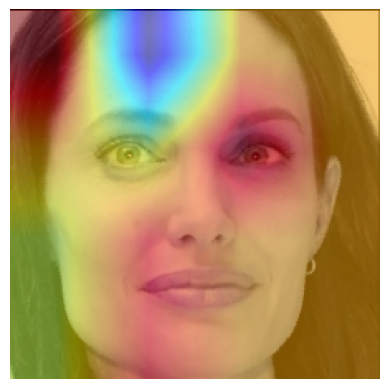

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

accuracy_array = [99.69073038468056, 99.66107439417048, 99.68225724453482, 99.68225724453482, 99.68225724453482, 99.67802067446195, 99.69073038468056, 99.68225724453482, 99.67802067446195, 99.68649381460769, 99.68225724453482, 99.68225724453482, 99.67802067446195, 99.68649381460769, 99.68225724453482, 99.68225724453482]
arr = np.array(accuracy_array)
# Reshape the array into an 8x8 array
arr_2d = arr.reshape((4, 4))
arr_2d = cv2.resize(arr_2d, (224, 224))
arr_2d = arr_2d - np.min(arr_2d)
cam = arr_2d / np.max(arr_2d)
original_image = cv2.imread("overlay_image.png")
original_image = cv2.resize(original_image, (224, 224))
cam_heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
cam_heatmap = cv2.cvtColor(cam_heatmap, cv2.COLOR_BGR2RGB)
overlayed_image = cv2.addWeighted(original_image, 0.5, cam_heatmap, 0.5, 0)

plt.imshow(overlayed_image)
plt.axis('off')  # Turn off axis labels
plt.show()